## Normalization (MinMax Scaling)
This transforms feature values into a fixed range, usually 0 to 1.

Formula:

                                            Xi' = (Xi - Min) / (Max - Min)

where, Min and Max are the minumum and maximum values in the feature.

### Example (salary):

Original: [20,000, 50,000, 90,000]\
Normalized (0–1): [0.0, 0.43, 1.0] every value is in-between 0 and 1. 

### Key Points:
- When features have different scales but you want them all in the same range.
- Works best when the data is not normally distributed.
- May change the shape of the distribution because everything is compresses or stretches in-between 0-1.
- Good for algorithms that calculate distance where having everything between 0–1 is important.
  1. KNN
  2. Neural Networks
  3. K-means Clustering
- Sensitive to outliers.



In [2]:
# Import liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("Salary Data.csv")
df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
65,38.0,Female,Master's,Digital Marketing Manager,10.0,90000.0
16,33.0,Female,Master's,Marketing Manager,7.0,90000.0
288,44.0,Male,Bachelor's,Senior Software Engineer,13.0,130000.0
279,49.0,Female,Master's,Director of Operations,21.0,180000.0
272,37.0,Male,Bachelor's,Senior Financial Analyst,8.0,90000.0


### Train Test Split the data

In [4]:
# train_test_split and filter the data
from sklearn.model_selection import train_test_split

X = df[['Age', 'Salary']]
y = df['Education Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### MinMax Scalar

In [5]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mms.fit(X_train)

X_train_transformed = mms.transform(X_train)
X_test_transformd = mms.transform(X_test)

In [6]:
# Converting transformed data into pandas dataframe
X_train_transformed = pd.DataFrame(X_train_transformed, columns = X_train.columns)
X_test_transformd = pd.DataFrame(X_test_transformd, columns = X_test.columns)
X_test_transformd.sample(5)
# X_test_transformed.sample(5)

,Age,Salary
56,0.965517,0.679551
32,0.206897,0.238935
48,0.172414,0.218906
12,0.206897,0.158822
4,0.655172,0.559383


In [7]:
# Describe function on original feature
X_train.describe()

,Age,Salary
count,299.000000,299.000000
mean,37.535117,100352.341137
std,7.014936,47906.438575
min,24.000000,350.000000
25%,32.000000,55000.000000
50%,37.000000,95000.000000
75%,44.000000,140000.000000
max,53.000000,250000.000000


In [8]:
# Describe function on scaled feature
X_train_transformed.describe()

,Age,Salary
count,299.000000,299.000000
mean,0.466728,0.400570
std,0.241894,0.191894
min,0.000000,0.000000
25%,0.275862,0.218906
50%,0.448276,0.379131
75%,0.689655,0.559383
max,1.000000,1.000000


As above we can see that original features have minimum and maximum value of 24, 350 and 53, 250000 respectively but after normalization our data is transformed in the range of 0 to 1. Both features have minimum value 0 and maximum value 1. 

### Ploting

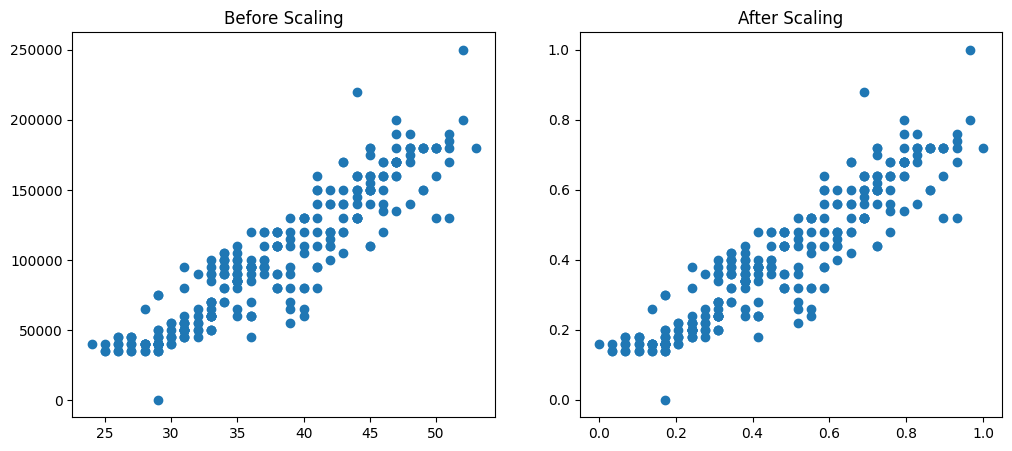

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['Salary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_transformed['Age'], X_train_transformed['Salary'])
ax2.set_title("After Scaling")

plt.show()

So, we can see that our data is compressed in the range 0-1.